<a href="https://colab.research.google.com/github/behzcd/Transport_Classificator/blob/main/creating_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import fastai

print(torch.__version__)
print(fastai.__version__)

1.13.1+cu116
2.7.11


In [ ]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 422, done.
remote: Total 422 (delta 0), reused 0 (delta 0), pack-reused 422
Receiving objects: 100% (422/422), 34.08 MiB | 12.89 MiB/s, done.
Resolving deltas: 100% (146/146), done.


In [ ]:
!cd OIDv4_ToolKit && pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 72.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.4/662.4 KB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 1.7 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


In [ ]:
!cd OIDv4_ToolKit && python main.py -h

usage: main.py
       [-h]
       [--Dataset /path/to/OID/csv/]
       [-y]
       [--classes list of classes [list of classes ...]]
       [--type_csv 'train' or 'validation' or 'test' or 'all']
       [--sub Subset of human verified images or machine generated h or m)]
       [--image_IsOccluded 1 or 0]
       [--image_IsTruncated 1 or 0]
       [--image_IsGroupOf 1 or 0]
       [--image_IsDepiction 1 or 0]
       [--image_IsInside 1 or 0]
       [--multiclasses 0 (default or 1]
       [--n_threads [default 20]]
       [--noLabels]
       [--limit integer number]
       <command>
       'downloader',
       'visualizer'
       or
       'ill_downloader'.

Open Image
Dataset
Downloader

positional arguments:
  <command> 'downloader', 'visualizer' or 'ill_downloader'.
    'downloader
    ', 'visuali
    zer' or 'il
    l_downloade
    r'.

optional arguments:
  -h, --help
    show this
    help
    message and
    exit
  --Dataset /path/to/OID/csv/
    Directory
    of the OID
    data

In [ ]:
!cd OIDv4_ToolKit && python3 main.py downloader --Dataset /content --classes Car Airplane Boat --type_csv train --limit 200


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Car.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...145%, 0 MB, 49598 KB/s, 0 seconds passed
[DOWNLOAD] | File clas

In [ ]:
from fastai.vision.all import *
from ipywidgets import widgets

#path
path = Path('train')
#fls = get_image_files(path)
#failed = verify_images(path)

#Datablock 
transports = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = Resize(224)
)

#Dataloader
dls = transports.dataloaders(path)

#Dataset check
#dls.train.show_batch(max_n=32, nrows=4)

#Train
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(4)

/usr/local/lib/python3.8/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pt

  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,1.371244,0.241216,0.900000,00:15


epoch,train_loss,valid_loss,accuracy,time
0,0.388527,0.186007,0.916667,00:11
1,0.247180,0.231345,0.908333,00:12
2,0.175128,0.227556,0.916667,00:11
3,0.142898,0.226354,0.908333,00:11


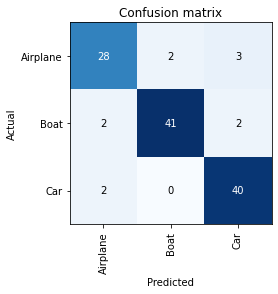

In [ ]:
#Checking
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

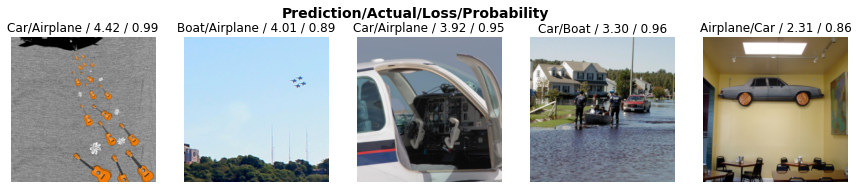

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Predict: Airplane
Probability: 99.0%


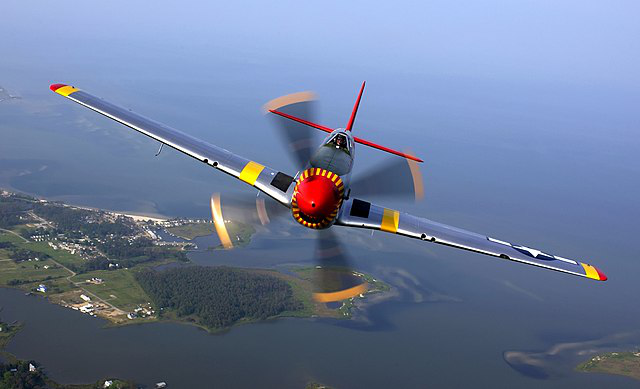

In [ ]:
img = PILImage.create(upload.data[-1])
pred, pred_id, probs = learn.predict(upload.data[-1])
print(f"Predict: {pred}")
print(f"Probability: {probs[pred_id]*100:.1f}%")
img

In [ ]:
learn.export('transport_model.pkl')

In [ ]:
model = load_learner('/content/transport_model.pkl')

In [ ]:
model.predict(upload.data[-1])

('Airplane', TensorBase(0), TensorBase([9.9006e-01, 9.4305e-03, 5.1444e-04]))